In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import plotly
import plotly.graph_objs as go
plotly.offline.init_notebook_mode(connected=True)
import math
%matplotlib inline

In [28]:
a =[2]*19
b=[3]*40
a.extend(b)
len(a)

59

In [58]:
fig.add_trace(
    go.Scatter(
        mode='markers',
        x=first,
        y=data.visitors[0:30],
        marker=dict(
            color='LightSkyBlue',
            size=20,
            line=dict(
                color='MediumPurple',
                width=2
            )
        ),
        name='Opacity 1.0'
    )
)


In [74]:
data.date.iloc[[1,4,5,21,40]]

175   2019-02-02
386   2019-02-05
501   2019-02-06
63    2019-02-22
230   2019-03-13
Name: date, dtype: datetime64[ns]

In [90]:
index = np.array(a)

In [107]:
not_anom = np.where(index==0)
anom = np.where(index==1)

In [113]:
index = [1]*20
b = [0]*39
index.extend(b)
index = np.array(index)

In [114]:
not_anom = np.where(index==0)
anom = np.where(index==1)

In [126]:
l1 = go.Scatter(x=data.date, y=data.visitors, name='Mobile',mode='lines')

l2=go.Scatter(
 x=data.date.iloc[not_anom],
 y=data.visitors.iloc[not_anom],
 mode='markers',
    marker=dict(color='blue')
 )

l3=go.Scatter(
 x=data.date.iloc[anom],
 y=data.visitors.iloc[anom],
 mode='markers',
 marker=dict(color='red')

 )


#l1.show()


d = [l1,l2,l3]
#l1.show()

plotly.offline.iplot({'data': d, 'layout': {
  'xaxis': {'title': 'Time'},
  'yaxis': {'title': 'Number of Visitors'}}})

In [78]:
fig.add_trace(go.Scatter(
    x=data.date.iloc[[1,4,5,21,58]],
    y=data.visitors.iloc[[1,4,5,21,58]],
    mode='markers',
    marker=dict(color='green')
    ))

#fig2.show()

In [59]:
fig = go.Figure(data=go.Scatter(
    x=data.date,
    y=data.visitors,
    mode='lines+markers',
    marker=dict(color=a)
    ))

fig.show()

In [44]:
df = pd.read_csv('shopper_conv.csv')
df.date = pd.to_datetime(df.date)
df = df.sort_values(by=['date'])
data = df[df.customer_type=='UNDETERMINED']
data = data[data.device_type == 'Mobile Phone']
l1 = go.Scatter(x=data.date, y=data.visitors, name='Mobile',mode='lines+markers', marker=dict(color=a))
d = [l1]



plotly.offline.iplot({'data': d, 'layout': {
    'xaxis': {'title': 'Time'},
    'yaxis': {'title': 'Number of Visitors'}}})


In [12]:
#from fbprophet import Prophet

In [2]:

# # # m = Prophet()
# # # m.fit(df.head(52))
# # future = m.make_future_dataframe(periods=7)
# # future.tail()
# forecast = m.predict(future)
# # forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
# fig1 = m.plot(forecast)
# fig2 = m.plot_components(forecast)

In [73]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler

Using TensorFlow backend.


In [84]:
# # frame a sequence as a supervised learning problem
# def timeseries_to_supervised(data, lag=1):
#     df = DataFrame(data)
    
#     columns = [df.shift(i) for i in range(1, lag+1)]
#     columns.append(df)
#     df = concat(columns, axis=1)
#     df.fillna(0, inplace=True)
#     return df

# import tensorflow as tf

# import math

# scaler = MinMaxScaler(feature_range=(0, 1))
# data = scaler.fit_transform(data.reshape(-1, 1))

# def get_window_data(data, window):

#     # Get window data and scale

#     scaler = MinMaxScaler(feature_range=(0, 1))

#     data = scaler.fit_transform(data.reshape(-1, 1))
#     #data = data.reshape(-1,1)
#     X = []
#     y = []
#     for i in range(len(data) - window):
#         X.append(data[i : i + window])
#         y.append(data[i + window])
#     X = np.asarray(X)
#     y = np.asarray(y)
#     return X, y, scaler

# window_size = 6


# X, y, scaler = get_window_data(a.orders.values, window_size)


# test_split=46
# X_train = X[:test_split]
# X_test = X[test_split:]
# y_train = y[:test_split]
# y_test = y[test_split:]

# model = Sequential()
# model.add(LSTM(50, input_shape=(window_size, 1)))
# model.add(Dropout(0.2))
# model.add(Dense(1))
# model.add(Activation("linear"))
# model.compile(loss="mse", optimizer="adam")

# history = model.fit(
#     X_train,
#     y_train,
#     epochs=20,
#     batch_size=1,
#     validation_data=(X_test, y_test),
#     verbose=2,
#     shuffle=False,
# )

# # plot history
# plt.figure(figsize=(6, 5), dpi=600)
# plt.plot(history.history["loss"], 'darkred', label="Train")
# plt.plot(history.history["val_loss"], 'darkblue', label="Test")
# plt.title("Loss over epoch")
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()

# y_pred = model.predict(X_test)

# d = np.array(a.orders).reshape(-1,1)

# k = scaler.fit_transform(d)

# y_pred = scaler.inverse_transform(y_pred)



# y_test = scaler.inverse_transform(y_test)



## Preprocessing

In [29]:
df = pd.read_csv('anomaly_det_dashboard_shopper_conv.csv')

In [31]:
df = df[df.visit_device_type!='E-Reader']

In [32]:
df.event_dt = pd.to_datetime(df.event_dt)

In [155]:
# filter out all customers and all devices 
#df = df[(df.cust_prospect_ind != 'All Visitors') & (df.visit_device_type != 'All Devices')]

AttributeError: 'DataFrame' object has no attribute 'cust_prospect_ind'

In [34]:
df = df[['totalshoppertraffic_visitors', 'digital_orders', 'cust_prospect_ind', 'visit_device_type', 'event_dt']]

In [35]:
df.sort_values(by=['event_dt'], ascending=True, inplace=True)

### totalshoppertraffic_visitors

In [36]:
undetermined = df[df.cust_prospect_ind == 'UNDETERMINED']
prospect = df[df.cust_prospect_ind == 'PROSPECT']
customer = df[df.cust_prospect_ind == 'CUSTOMER']

In [37]:
desktop = df[df.visit_device_type=='Desktop']
mobile = df[df.visit_device_type=='Mobile Phone']
tablet = df[df.visit_device_type=='Tablet']
game = df[df.visit_device_type=='Gaming Console']
e_reader = df[df.visit_device_type=='E-Reader']

In [38]:
def plot_visitor_by_device(df):
    undetermined = df[df.cust_prospect_ind == 'UNDETERMINED']
    prospect = df[df.cust_prospect_ind == 'PROSPECT']
    customer = df[df.cust_prospect_ind == 'CUSTOMER']
    l1 = go.Scatter(x=undetermined.event_dt, y=undetermined.totalshoppertraffic_visitors, name='Undetermined')
    
    

In [39]:
def plot_visitor_by_cust(df):
    mobile = df[df.visit_device_type == 'Mobile Phone']
    tablet = df[df.visit_device_type == 'Tablet']
    desktop = df[df.visit_device_type == 'Desktop']
    gaming = df[df.visit_device_type == 'Gaming Console']
    reader = df[df.visit_device_type == 'E-Reader']
    
    l1 = go.Scatter(x=mobile.event_dt, y=mobile.totalshoppertraffic_visitors, name='Mobile')
    l2 = go.Scatter(x=tablet.event_dt, y=tablet.totalshoppertraffic_visitors, name='Tablet')
    l3 = go.Scatter(x=desktop.event_dt, y=desktop.totalshoppertraffic_visitors, name='Desktop')
    l4 = go.Scatter(x=gaming.event_dt, y=gaming.totalshoppertraffic_visitors, name='Gaming Console')
    l5 = go.Scatter(x=reader.event_dt, y=reader.totalshoppertraffic_visitors, name='E-Reader')
    
    data = [l1,l2,l3,l4,l5]
    plotly.offline.iplot({'data': data, 'layout': {
        'xaxis': {'title': 'Time'},
        'yaxis': {'title': 'Number of Visitors'}
    }})


In [40]:
plot_visitor_by_cust(undetermined)

## create csv files across cust and device

In [41]:
import itertools

In [42]:
cust = list(df.cust_prospect_ind.unique())

In [43]:
device = list(df.visit_device_type.unique())

In [44]:
combo = list(itertools.product(cust, device))

In [46]:
for c in combo:
    d = df[(df['cust_prospect_ind'] == c[0]) & (df['visit_device_type'] == c[1])]
    d = d[['event_dt', 'totalshoppertraffic_visitors','digital_orders']]
    d.columns = ['date','visitors','orders']
    name = '{}_{}.csv'.format(str(c[0].lower()), str(c[1].lower()))
    d.to_csv(name, index=False)

   
    

In [47]:
plot_visitor_by_cust(prospect)

In [48]:
plot_visitor_by_cust(customer)

In [215]:
df = pd.read_csv('shopper_conv.csv')
df.head()

,visitors,orders,customer_type,device_type,date
0,13030,291,CUSTOMER,Tablet,3/12/2019
1,927,0,UNDETERMINED,Gaming Console,3/12/2019
2,161097,3820,CUSTOMER,Desktop,3/12/2019
3,21400,90,PROSPECT,Mobile Phone,3/12/2019
4,16,1,CUSTOMER,Gaming Console,3/12/2019


In [228]:
import datetime as dt

In [230]:
df.date = pd.to_datetime(df.date)

In [232]:
df.date = df.date.dt.strftime('%m-%d')

In [233]:
df.sort_values(by='date',ascending=True,inplace=True)

In [220]:
df.columns = ['visitors','orders','cust','device','date']

In [186]:
df.date = df['date'].apply(lambda x:x.toordinal())

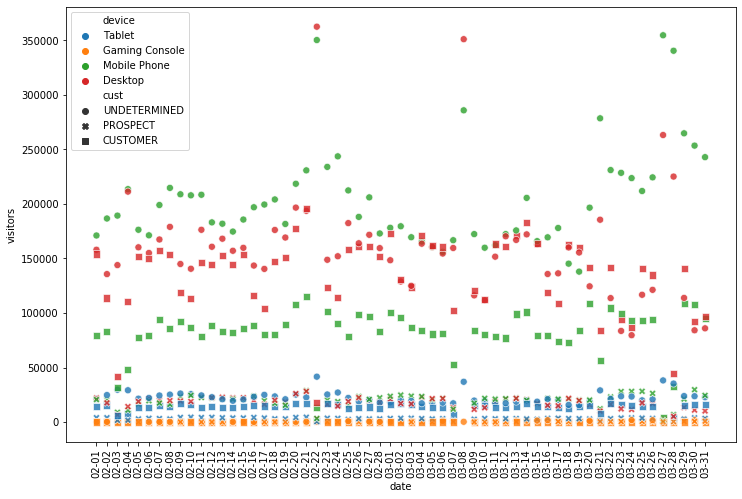

In [246]:
import seaborn as sns
fig,ax = plt.subplots(figsize=(12,8)) 
plt.xticks(rotation=90)
sns.scatterplot( x="date", y="visitors", data=df, \
                hue='device', legend='brief', alpha=.8, style='cust', s=50)


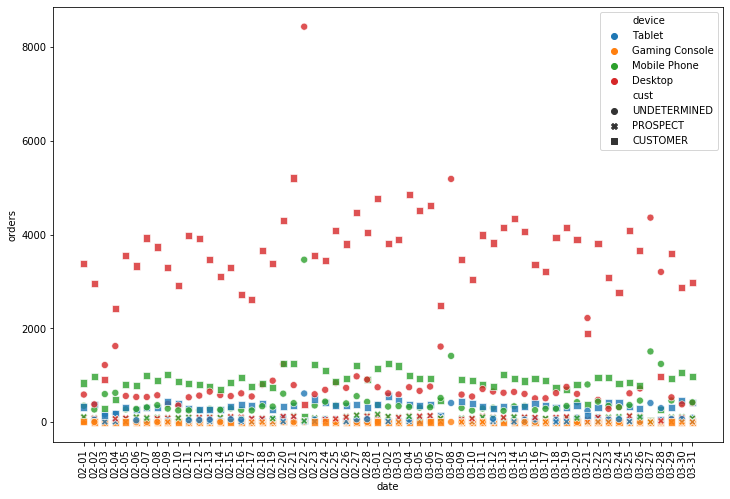

In [244]:
fig,ax = plt.subplots(figsize=(12,8)) 
plt.xticks(rotation=90)
sns.scatterplot( x="date", y='orders', data=df, \
                hue='device', legend='brief', alpha=.8, style='cust', s=50)

In [236]:
l = go.Scatter(x=df1.date, y=df1.visitors)
plotly.offline.iplot({'data': [l], 'layout': {
    'xaxis': {'title': 'Date'},
    'yaxis': {'title': '#Visitors'},
    'title': '#Visitors of Undetermined from Mobile'
}})


In [ ]:

    l1 = go.Scatter(x=mobile.event_dt, y=mobile.totalshoppertraffic_visitors, name='Mobile')
    l2 = go.Scatter(x=tablet.event_dt, y=tablet.totalshoppertraffic_visitors, name='Tablet')
    l3 = go.Scatter(x=desktop.event_dt, y=desktop.totalshoppertraffic_visitors, name='Desktop')
    l4 = go.Scatter(x=gaming.event_dt, y=gaming.totalshoppertraffic_visitors, name='Gaming Console')
    l5 = go.Scatter(x=reader.event_dt, y=reader.totalshoppertraffic_visitors, name='E-Reader')
    
    data = [l1,l2,l3,l4,l5]
    plotly.offline.iplot({'data': data, 'layout': {
        'xaxis': {'title': 'Time'},
        'yaxis': {'title': 'Number of Visitors'}
    }})


### clustering based anomaly detection

### isolation forest

In [103]:
df.columns

Index(['totalshoppertraffic_visitors', 'digital_orders', 'cust_prospect_ind',
       'visit_device_type', 'event_dt'],
      dtype='object')

In [3]:
X = df1[['visitors','orders']]
#X = df[['totalshoppertraffic_visitors','digital_orders']]

In [4]:
from sklearn.preprocessing import StandardScaler
#from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
scaler.fit(X)
StandardScaler(copy=True, with_mean=True, with_std=True)
X = scaler.transform(X)

In [5]:
X = pd.DataFrame(X)

In [6]:
from sklearn.ensemble import IsolationForest
clf=IsolationForest(n_estimators=35, max_samples='auto', contamination=float(.1), \
                        max_features=1, bootstrap=False, n_jobs=-1, random_state=42, verbose=0)
clf.fit(X)
pred = clf.predict(X)
X['anomaly']=pred
outliers=X.loc[X['anomaly']==-1]
outlier_index=list(outliers.index)
#print(outlier_index)
#Find the number of anomalies and normal points here points classified -1 are anomalous
print(X['anomaly'].value_counts())

 1    53
-1     6
Name: anomaly, dtype: int64


C:\Users\Xiaoxin.Xu\AppData\Local\Continuum\anaconda3\envs\env2\lib\site-packages\sklearn\ensemble\iforest.py:247: FutureWarning:

behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.

C:\Users\Xiaoxin.Xu\AppData\Local\Continuum\anaconda3\envs\env2\lib\site-packages\sklearn\ensemble\iforest.py:415: DeprecationWarning:

threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.



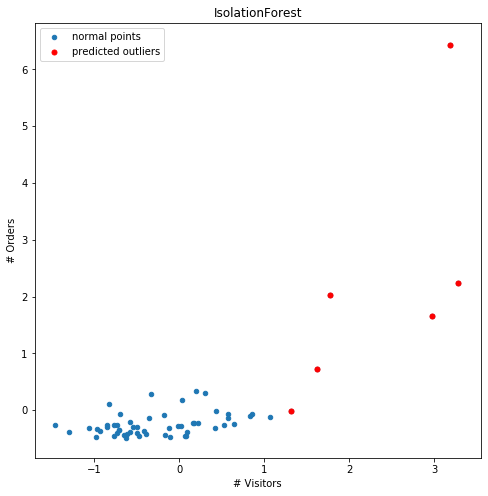

In [7]:
Z = np.array(X)
plt.figure(figsize=(8,8))

plt.title("IsolationForest")
#plt.contourf( Z, cmap=plt.cm.Blues_r)
b1 = plt.scatter(Z[:,0], Z[:,1],
                 s=20,label="normal points")
b1 =plt.scatter(X.iloc[outlier_index,0],X.iloc[outlier_index,1], c='red',s=25,label="predicted outliers")
#plt.xlim(-2,4)
#plt.ylim(-1,4)
plt.xlabel('# Visitors')
plt.ylabel('# Orders')
plt.legend(loc="upper left")
plt.show()

In [92]:
from sklearn.decomposition import PCA

In [93]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
StandardScaler(copy=True, with_mean=True, with_std=True)
X = scaler.transform(X)

In [94]:
from sklearn.cluster import KMeans
import numpy as np


In [139]:
undetermined = df[df.cust_prospect_ind=='UNDETERMINED']
X = undetermined[['totalshoppertraffic_visitors','digital_orders']]
y = undetermined.visit_device_type
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)


In [140]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)


In [141]:
kmeans.predict(X)

array([2, 2, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 2, 2, 0, 0,
       2, 2, 0, 0, 2, 2, 2, 0, 0, 2, 0, 0, 2, 2, 0, 0, 2, 2, 2, 2, 0, 0,
       2, 0, 0, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 2, 2, 0, 0, 2, 0,
       0, 2, 2, 0, 0, 2, 0, 2, 2, 0, 0, 2, 2, 0, 2, 0, 2, 0, 0, 0, 1, 1,
       2, 0, 0, 2, 0, 2, 0, 2, 2, 2, 0, 0, 0, 2, 2, 0, 0, 2, 0, 2, 2, 2,
       0, 0, 0, 2, 2, 0, 0, 2, 0, 2, 2, 2, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0,
       0, 0, 2, 2, 2, 0, 0, 2, 0, 1, 2, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2,
       0, 0, 0, 2, 2, 0, 2, 0, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2, 2,
       2, 2, 0, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 2, 0, 2, 0, 2, 0, 0,
       2, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 2, 1, 0, 0,
       0, 0, 1, 2, 0, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2])

In [142]:
temp = pd.DataFrame({'totalshoppertraffic_visitors':X[:,0],'digital_orders':X[:,1],'device':undetermined.visit_device_type})

In [294]:
X = mobile[['totalshoppertraffic_visitors','digital_orders']]
y = mobile.cust_prospect_ind

In [295]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)

In [296]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
kmeans.labels_

array([2, 1, 0, 1, 0, 2, 2, 0, 0, 0, 2, 0, 0, 1, 2, 2, 0, 1, 1, 2, 0, 0,
       1, 2, 1, 2, 0, 1, 0, 2, 0, 2, 1, 0, 2, 1, 2, 1, 0, 1, 0, 2, 1, 2,
       0, 2, 1, 0, 2, 1, 0, 1, 0, 2, 0, 2, 1, 2, 1, 0, 2, 1, 0, 0, 0, 1,
       0, 1, 2, 0, 2, 1, 2, 0, 1, 1, 2, 0, 1, 0, 2, 2, 1, 0, 1, 2, 0, 0,
       1, 2, 2, 1, 0, 1, 2, 0, 2, 1, 0, 1, 0, 2, 0, 0, 2, 1, 2, 0, 1, 0,
       2, 1, 2, 1, 0, 2, 1, 0, 2, 0, 1, 1, 0, 2, 1, 2, 0, 0, 1, 2, 0, 2,
       1, 2, 1, 0, 0, 2, 1, 1, 0, 2, 0, 2, 0, 0, 2, 1, 1, 2, 0, 2, 1, 0,
       0, 1, 2, 0, 2, 1, 0, 2, 0, 0, 0, 2, 1, 2, 0, 1, 0, 2, 0, 2, 1])

In [297]:
kmeans.predict(X)

array([2, 1, 0, 1, 0, 2, 2, 0, 0, 0, 2, 0, 0, 1, 2, 2, 0, 1, 1, 2, 0, 0,
       1, 2, 1, 2, 0, 1, 0, 2, 0, 2, 1, 0, 2, 1, 2, 1, 0, 1, 0, 2, 1, 2,
       0, 2, 1, 0, 2, 1, 0, 1, 0, 2, 0, 2, 1, 2, 1, 0, 2, 1, 0, 0, 0, 1,
       0, 1, 2, 0, 2, 1, 2, 0, 1, 1, 2, 0, 1, 0, 2, 2, 1, 0, 1, 2, 0, 0,
       1, 2, 2, 1, 0, 1, 2, 0, 2, 1, 0, 1, 0, 2, 0, 0, 2, 1, 2, 0, 1, 0,
       2, 1, 2, 1, 0, 2, 1, 0, 2, 0, 1, 1, 0, 2, 1, 2, 0, 0, 1, 2, 0, 2,
       1, 2, 1, 0, 0, 2, 1, 1, 0, 2, 0, 2, 0, 0, 2, 1, 1, 2, 0, 2, 1, 0,
       0, 1, 2, 0, 2, 1, 0, 2, 0, 0, 0, 2, 1, 2, 0, 1, 0, 2, 0, 2, 1])

In [298]:
temp.columns = ['visitors','orders','device']
#temp.columns = ['visitors','orders','customer']

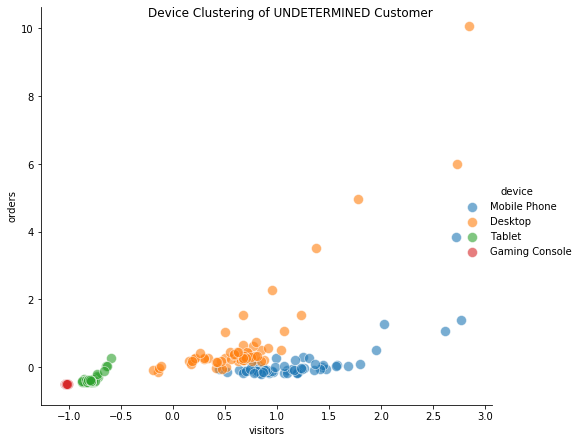

In [291]:
g = sns.pairplot(x_vars='visitors', y_vars='orders', data=temp, hue='device', size=10, plot_kws=
    {
    "s":100,
    "alpha":0.6
    })
#g.fig.legend(loc='upper left', ncol=1)
g.fig.suptitle("Device Clustering of UNDETERMINED Customer")
g.fig.set_size_inches(8,6)

In [130]:
temp = pd.DataFrame({'totalshoppertraffic_visitors':X[:,0],'digital_orders':X[:,1],'customer':mobile.cust_prospect_ind})

In [303]:
temp2 = mobile[['totalshoppertraffic_visitors','digital_orders','cust_prospect_ind']]


In [304]:
temp2.columns = ['visitors','orders','customer']

In [ ]:
g2 = sns.pairplot(x_vars='visitors', y_vars='orders', data=temp2, hue='customer', size=10, plot_kws=


In [314]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()

In [322]:
temp2['cust'] = le.fit_transform(temp2.customer)

C:\Users\Xiaoxin.Xu\AppData\Local\Continuum\anaconda3\envs\env2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [325]:
X = temp2[['visitors','orders']]
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)

In [331]:
d = {'UNDETERMINED':2, 'CUSTOMER':1, 'PROSPECT':0}

In [332]:
temp2.cust = temp2.customer.map(d)

C:\Users\Xiaoxin.Xu\AppData\Local\Continuum\anaconda3\envs\env2\lib\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



No handles with labels found to put in legend.


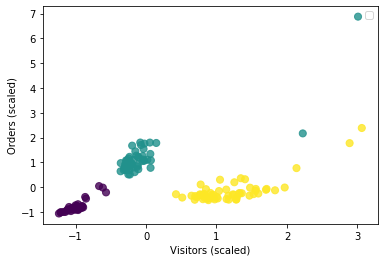

In [361]:
import matplotlib.pyplot as plt
f, ax = plt.subplots()
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, s=50, alpha=0.8)
ax.set_xlabel('Visitors (scaled)')
ax.set_ylabel('Orders (scaled)')
plt.legend()


Text(0, 0.5, 'Orders (scaled)')

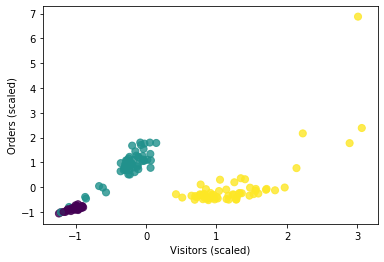

In [356]:
f, ax = plt.subplots()
plt.scatter(X[:, 0], X[:, 1], c=temp2.cust, s=50, alpha=0.8)
ax.set_xlabel('Visitors (scaled)')
ax.set_ylabel('Orders (scaled)')


Text(0, 0.5, 'Orders (scaled)')

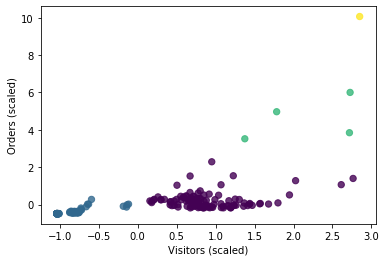

In [391]:
X = temp[['visitors','orders']]
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
kmeans = KMeans(n_clusters=4, random_state=0).fit(X)
f, ax = plt.subplots()
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, s=40, alpha=0.8)
ax.set_xlabel('Visitors (scaled)')
ax.set_ylabel('Orders (scaled)')

In [392]:
temp.customer.value_counts()

Mobile Phone      59
Desktop           59
Gaming Console    59
Tablet            59
Name: customer, dtype: int64

In [396]:
d2 = {'Mobile Phone':0, 'Desktop':1,'Gaming Console':3, 'Tablet':2}

In [397]:
temp['device'] = temp.customer.map(d2)

Text(0, 0.5, 'Orders (scaled)')

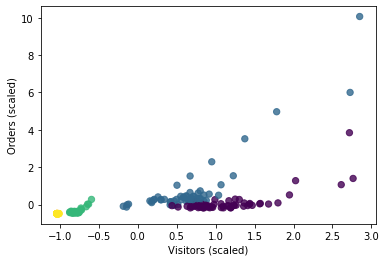

In [398]:
f, ax = plt.subplots()
plt.scatter(X[:, 0], X[:, 1], c=temp.device, s=40, alpha=0.8)
ax.set_xlabel('Visitors (scaled)')
ax.set_ylabel('Orders (scaled)')


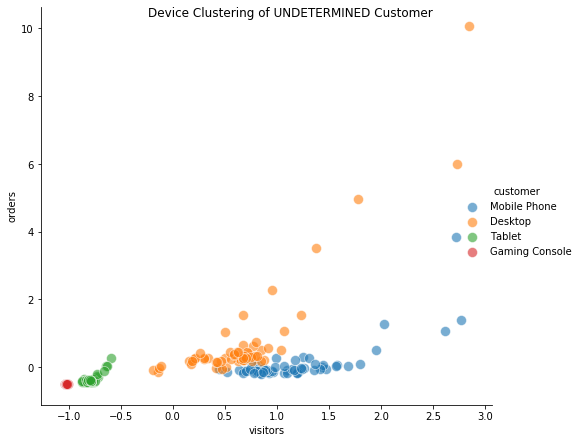

In [400]:
g = sns.pairplot(x_vars='visitors', y_vars='orders', data=temp, hue='customer', size=10, plot_kws=
    {
    "s":100,
    "alpha":0.6
    })
#g.fig.legend(loc='upper left', ncol=1)
g.fig.suptitle("Device Clustering of UNDETERMINED Customer")
g.fig.set_size_inches(8,6)

### one class svm


In [12]:
from sklearn import svm

In [92]:
clf = svm.OneClassSVM(kernel='sigmoid',nu=0.1)

In [93]:
clf.fit(X)

C:\Users\Xiaoxin.Xu\AppData\Local\Continuum\anaconda3\envs\env2\lib\site-packages\sklearn\svm\base.py:193: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.



OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma='auto_deprecated',
            kernel='sigmoid', max_iter=-1, nu=0.1, random_state=None,
            shrinking=True, tol=0.001, verbose=False)

In [94]:
y_pred = clf.predict(X)

In [95]:
y_pred

array([ 1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1], dtype=int64)

In [96]:
X = np.array(X)

Text(0, 0.5, 'Orders (scaled)')

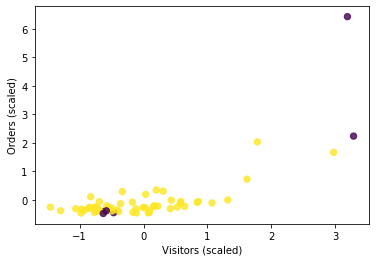

In [97]:
f, ax = plt.subplots()
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=40, alpha=0.8)
ax.set_xlabel('Visitors (scaled)')
ax.set_ylabel('Orders (scaled)')


In [98]:
outlier_index = np.where(y_pred==-1)

In [99]:
X = pd.DataFrame(X)

In [100]:
len(np.array(outlier_index).flatten())

6

In [101]:
X.iloc[np.array(outlier_index).flatten(), 0]

4    -0.617769
11   -0.469478
21    3.189789
40   -0.630766
44   -0.582168
54    3.285804
Name: 0, dtype: float64

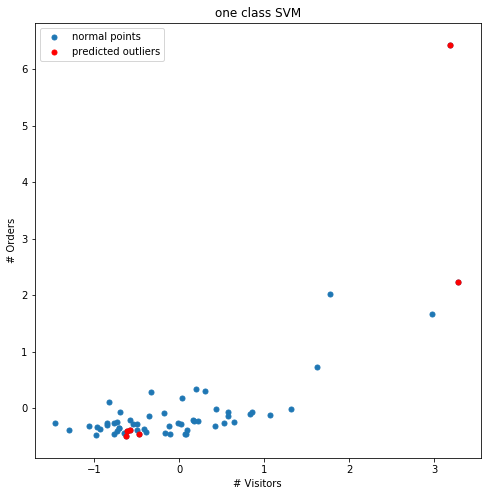

In [102]:
Z = np.array(X)
plt.figure(figsize=(8,8))

plt.title("one class SVM")
#plt.contourf( Z, cmap=plt.cm.Blues_r)
b1 = plt.scatter(Z[:,0], Z[:,1],
                 s=25,label="normal points")
b1 =plt.scatter(X.iloc[np.array(outlier_index).flatten(), 0],X.iloc[np.array(outlier_index).flatten(), 1], c='red',s=25,label="predicted outliers")
#plt.xlim(-2,4)
#plt.ylim(-1,4)
plt.xlabel('# Visitors')
plt.ylabel('# Orders')
plt.legend(loc="upper left")
plt.show()

One-Class Support Vector Machine (1-SVM)[15] is a support vector machinebased method that transforms the data to a higher dimensional space and
seeks to build a hyperplane decision boundary assuming the training points
belong to one class and all non-training points belong to another class.
Isolation Forest (IF)[11] is a binary forest approach that at each node randomly selects a dimension and then randomly selects a splitting threshold.
It continues until each node has a single sample. An ensemble of trees are
constructed using this method. By chance, samples with unusual values are
more likely to be isolated early in the tree growing than samples in clusters,

In [103]:
df2 = pd.read_csv('customer_mobile.csv')

In [106]:
l = go.Scatter(x=df2.date, y=df2.visitors)
plotly.offline.iplot({'data': [l], 'layout': {
    'xaxis': {'title': 'Date'},
    'yaxis': {'title': '#Visitors'},
    'title': '#Visitors of Customer from Mobile'
}})


In [ ]:
# 5/22, 3/7, 3/21. 3/27, 3/28

In [107]:
df3 = pd.read_csv('prospect_mobile.csv')
l = go.Scatter(x=df3.date, y=df3.visitors)
plotly.offline.iplot({'data': [l], 'layout': {
    'xaxis': {'title': 'Date'},
    'yaxis': {'title': '#Visitors'},
    'title': '#Visitors of Customer from Mobile'
}})


In [108]:
df4 = pd.read_csv('customer_desktop.csv')
l = go.Scatter(x=df4.date, y=df4.visitors)
plotly.offline.iplot({'data': [l], 'layout': {
    'xaxis': {'title': 'Date'},
    'yaxis': {'title': '#Visitors'},
    'title': '#Visitors of Customer from Mobile'
}})


In [112]:
df = pd.read_csv('anomaly_det_dashboard_shopper_conv.csv')

In [113]:
df.columns

Index(['totalshoppertraffic_visitors', 'totalshoppertraffic_visits',
       'digital_orders', 'aal_orders', 'eup_orders', 'nao_orders',
       'nse_orders', 'nso_orders', 'nsp_orders', 'npp_orders', 'total_orders',
       'cust_prospect_ind', 'visit_device_type', 'event_dt'],
      dtype='object')

In [114]:
df = df[['totalshoppertraffic_visitors','digital_orders','cust_prospect_ind','visit_device_type','event_dt']]

In [115]:
df.columns

Index(['totalshoppertraffic_visitors', 'digital_orders', 'cust_prospect_ind',
       'visit_device_type', 'event_dt'],
      dtype='object')

In [116]:
df.columns = ['visitors','orders','customer','device','date']

In [118]:
df.customer.unique()

array(['UNDETERMINED', 'CUSTOMER', 'PROSPECT', 'All Visitors'],
      dtype=object)

In [120]:
a = df[(df.customer=='All Visitors') & (df.device == 'All Devices')]

In [121]:
a.sort_values(by='date', ascending=True, inplace=True)

C:\Users\Xiaoxin.Xu\AppData\Local\Continuum\anaconda3\envs\env2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [123]:
a.date = pd.to_datetime(a.date)

C:\Users\Xiaoxin.Xu\AppData\Local\Continuum\anaconda3\envs\env2\lib\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [124]:
a.sort_values(by='date', ascending=True, inplace=True)

C:\Users\Xiaoxin.Xu\AppData\Local\Continuum\anaconda3\envs\env2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [125]:
a.head()

,visitors,orders,customer,device,date
270,644248,5735,All Visitors,All Devices,2019-02-01
299,600854,5154,All Visitors,All Devices,2019-02-02
23,452830,3374,All Visitors,All Devices,2019-02-03
199,636388,5633,All Visitors,All Devices,2019-02-04
661,638629,5693,All Visitors,All Devices,2019-02-05


In [176]:
l = go.Scatter(x=a.date, y=a.visitors)
plotly.offline.iplot({'data': [l], 'layout': {
    'xaxis': {'title': 'Date'},
    'yaxis': {'title': '#Visitors'},
    'title': '#All Visitors',
    'width': 1000,
    'height':400
}})

In [175]:
l = go.Scatter(x=a.date, y=a.orders)
plotly.offline.iplot({'data': [l], 'layout': {
    'xaxis': {'title': 'Date'},
    'yaxis': {'title': '#Orders'},
    'title': '#All Orders',
    'width': 1000,
    'height':400
}})

In [136]:
a.to_csv('all.csv')

In [ ]:
layout = go.Layout(
    autosize=False,
    width=500,
    height=500,
    margin=go.layout.Margin(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),

In [174]:
l = go.Scatter(x=a.date, y=a.rate)
plotly.offline.iplot({'data': [l],'layout': {
    'xaxis': {'title': 'Date'},
    'yaxis': {'title': 'Rate'},
    'title': 'Conversion Rate',
    'width': 1000,
    'height':400
}})

In [128]:
a['rate'] = a.orders/a.visitors

C:\Users\Xiaoxin.Xu\AppData\Local\Continuum\anaconda3\envs\env2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [156]:
df = pd.read_csv('shopper_conv.csv')

In [158]:
df.sort_values(by='date', ascending=True, inplace=True)

In [159]:
df['rate'] = df.orders/df.visitors

In [163]:
df.columns = ['visitors','orders','customer','device','date','rate']

In [164]:
df_no_gaming = df[df.device!='Gaming Console']
df_no_e_no_gaming = df_no_gaming[df_no_gaming.device!='E-Reader']

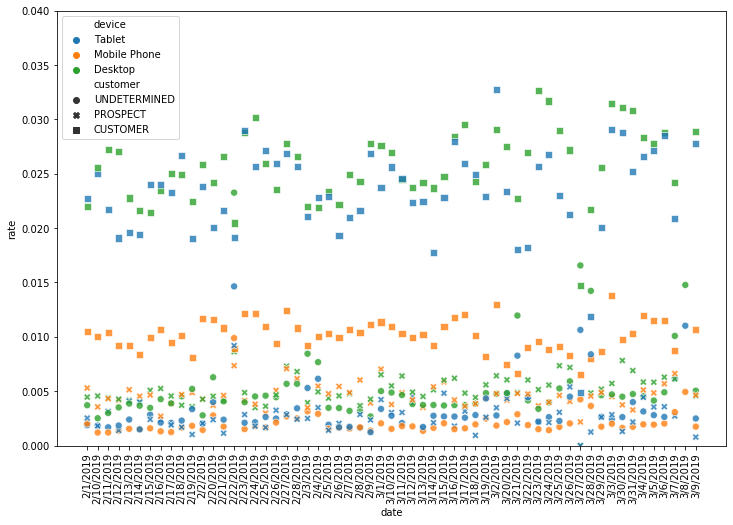

In [165]:
fig,ax = plt.subplots(figsize=(12,8)) 
plt.xticks(rotation=90)
plt.ylim(0,0.04)
sns.scatterplot( x="date", y="rate", data=df_no_e_no_gaming, \
                hue='device', legend='brief', alpha=.8, style='customer', s=50)

### foreocasting plots

In [ ]:
def plot_visitor_by_cust(df):
    mobile = df[df.visit_device_type == 'Mobile Phone']
    tablet = df[df.visit_device_type == 'Tablet']
    desktop = df[df.visit_device_type == 'Desktop']
    gaming = df[df.visit_device_type == 'Gaming Console']
    reader = df[df.visit_device_type == 'E-Reader']
    
    l1 = go.Scatter(x=mobile.event_dt, y=mobile.totalshoppertraffic_visitors, name='Mobile')
    l2 = go.Scatter(x=tablet.event_dt, y=tablet.totalshoppertraffic_visitors, name='Tablet')
    l3 = go.Scatter(x=desktop.event_dt, y=desktop.totalshoppertraffic_visitors, name='Desktop')
    l4 = go.Scatter(x=gaming.event_dt, y=gaming.totalshoppertraffic_visitors, name='Gaming Console')
    l5 = go.Scatter(x=reader.event_dt, y=reader.totalshoppertraffic_visitors, name='E-Reader')
    
    data = [l1,l2,l3,l4,l5]
    plotly.offline.iplot({'data': data, 'layout': {
        'xaxis': {'title': 'Time'},
        'yaxis': {'title': 'Number of Visitors'}
    }})


In [40]:
a = pd.read_csv('all.csv')

In [13]:
arima = [ 587041.8, 562037.4 ,593164.4 ,651019.6 ,644461.6, 610559.7, 624607.1]

In [22]:
ets = [ 572441.8, 642511.4 ,635660.6, 668974.8, 648185.1 ,678430.0 ,611950.5]

In [25]:
hw = [573423.5, 641354.1, 632152.1, 636734.9, 649637.9, 670254.9 ,608246.3]

In [99]:
lstm = y_pred.flatten()

In [38]:
fb = [622746.854428,
    612109.724528,
    641360.168485,
    632263.708639,
    641657.590922,
    570743.457852,
    533088.010398]

In [96]:
tail = a.date.unique()[-7:]

In [2]:
df1 = pd.read_csv('undetermined_mobile.csv')

In [3]:
df2 = pd.read_csv('undetermined_desktop.csv')
df3 = pd.read_csv('undetermined_tablet.csv')

In [4]:
df4 = pd.read_csv('prospect_mobile.csv')
df5 = pd.read_csv('prospect_desktop.csv')
df6 = pd.read_csv('prospect_tablet.csv')

In [5]:
df7 = pd.read_csv('customer_mobile.csv')
df8 = pd.read_csv('customer_desktop.csv')
df9 = pd.read_csv('customer_tablet.csv')

In [11]:
df1.date = pd.to_datetime(df1.date)
df2.date = pd.to_datetime(df2.date)
df3.date = pd.to_datetime(df3.date)
df4.date = pd.to_datetime(df4.date)
df5.date = pd.to_datetime(df5.date)
df6.date = pd.to_datetime(df6.date)
df7.date = pd.to_datetime(df7.date)
df8.date = pd.to_datetime(df8.date)
df9.date = pd.to_datetime(df9.date)

In [12]:
l1 = go.Scatter(x=df1.date, y=df1.visitors, name="Undetermined Mobile")
l2 = go.Scatter(x=df2.date, y=df2.visitors, name="Undetermined Desktop",    line = dict(width = 2, dash = 'dash', color='#1f77b4'))
l3 = go.Scatter(x=df3.date, y=df3.visitors, name="Undetermined Tablet",    line = dict(width = 2, dash = 'dot', color='#1f77b4'))
l4 = go.Scatter(x=df4.date, y=df4.visitors, name="Prospect Mobile",    line = dict(width = 2, color='#ff7f0e'))
l5 = go.Scatter(x=df5.date, y=df5.visitors, name="Prospect Desktop",    line = dict(width = 2, dash = 'dash',color='#ff7f0e'))
l6 = go.Scatter(x=df6.date, y=df6.visitors, name="Prospect Tablet",    line = dict(width = 2, dash = 'dot',color='#ff7f0e'))
l7 = go.Scatter(x=df7.date, y=df7.visitors, name="Customer Mobile",    line = dict(width = 2,color='#2ca02c'))
l8 = go.Scatter(x=df8.date, y=df8.visitors, name="Customer Desktop",    line = dict(width = 2, dash = 'dash',color='#2ca02c'))
l9 = go.Scatter(x=df9.date, y=df9.visitors, name="Customer Tablet",    line = dict(width = 2, dash = 'dot',color='#2ca02c'))
layout = go.Layout(
    autosize=False,
    width=1200,
    height=800)
data=[l1 ,l2, l3, l4,l5,l6,l7,l8,l9]
plotly.offline.iplot({'data':data, 'layout':layout})

In [13]:
l1 = go.Scatter(x=df1.date, y=df1.orders, name="Undetermined Mobile")
l2 = go.Scatter(x=df2.date, y=df2.orders, name="Undetermined Desktop",    line = dict(width = 2, dash = 'dash', color='#1f77b4'))
l3 = go.Scatter(x=df3.date, y=df3.orders, name="Undetermined Tablet",    line = dict(width = 2, dash = 'dot', color='#1f77b4'))
l4 = go.Scatter(x=df4.date, y=df4.orders, name="Prospect Mobile",    line = dict(width = 2, color='#ff7f0e'))
l5 = go.Scatter(x=df5.date, y=df5.orders, name="Prospect Desktop",    line = dict(width = 2, dash = 'dash',color='#ff7f0e'))
l6 = go.Scatter(x=df6.date, y=df6.orders, name="Prospect Tablet",    line = dict(width = 2, dash = 'dot',color='#ff7f0e'))
l7 = go.Scatter(x=df7.date, y=df7.orders, name="Customer Mobile",    line = dict(width = 2,color='#2ca02c'))
l8 = go.Scatter(x=df8.date, y=df8.orders, name="Customer Desktop",    line = dict(width = 2, dash = 'dash',color='#2ca02c'))
l9 = go.Scatter(x=df9.date, y=df9.orders, name="Customer Tablet",    line = dict(width = 2, dash = 'dot',color='#2ca02c'))
layout = go.Layout(
    autosize=False,
    width=1200,
    height=800)
data=[l1 ,l2, l3, l4,l5,l6,l7,l8,l9]
plotly.offline.iplot({'data':data, 'layout':layout})

In [14]:
l1 = go.Scatter(x=df1.date, y=df1.rate, name="Undetermined Mobile")
l2 = go.Scatter(x=df2.date, y=df2.rate, name="Undetermined Desktop",    line = dict(width = 2, dash = 'dash', color='#1f77b4'))
l3 = go.Scatter(x=df3.date, y=df3.rate, name="Undetermined Tablet",    line = dict(width = 2, dash = 'dot', color='#1f77b4'))
l4 = go.Scatter(x=df4.date, y=df4.rate, name="Prospect Mobile",    line = dict(width = 2, color='#ff7f0e'))
l5 = go.Scatter(x=df5.date, y=df5.rate, name="Prospect Desktop",    line = dict(width = 2, dash = 'dash',color='#ff7f0e'))
l6 = go.Scatter(x=df6.date, y=df6.rate, name="Prospect Tablet",    line = dict(width = 2, dash = 'dot',color='#ff7f0e'))
l7 = go.Scatter(x=df7.date, y=df7.rate, name="Customer Mobile",    line = dict(width = 2,color='#2ca02c'))
l8 = go.Scatter(x=df8.date, y=df8.rate, name="Customer Desktop",    line = dict(width = 2, dash = 'dash',color='#2ca02c'))
l9 = go.Scatter(x=df9.date, y=df9.rate, name="Customer Tablet",    line = dict(width = 2, dash = 'dot',color='#2ca02c'))
layout = go.Layout(
    autosize=False,
    width=1200,
    height=800)
data=[l1 ,l2, l3, l4,l5,l6,l7,l8,l9]
plotly.offline.iplot({'data':data, 'layout':layout})

In [15]:
d = pd.read_csv('shopper_conv.csv')

In [17]:
d.columns = ['visitors','orders','customer','device','date','rate']

In [19]:
desktop = d[d.device=='Desktop']

In [21]:
sum(desktop.orders)/sum(desktop.visitors)

0.014543657096358398

In [38]:
266/13

20.46153846153846

In [26]:
mobile=d[d.device=='Mobile Phone']

In [28]:
sum(mobile.orders)/sum(mobile.visitors)

0.004537980325209161

In [29]:
tablet = d[d.device=='Tablet']
sum(tablet.orders)/sum(tablet.visitors)

0.010597178017327355

In [16]:
a = pd.read_csv('all.csv')
a.date = pd.to_datetime(a.date)
tail = a.date.tail(7)
true = list(a.tail(7).visitors)

In [28]:
from scipy import stats
from sklearn.metrics import mean_absolute_error

In [33]:
def mape(y_true, y_pred): 
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [37]:
naive = [567274]*7

In [8]:
arima = [602885.9,595676.8, 604511.6, 628609.3, 639663.2, 617956.5, 620277.1]

In [9]:
ets = [638841.8, 631353.2, 664535.4 ,656833.8, 672732.9, 603716.9, 585876.2]

In [42]:
tets = [ 635591.2, 625937.3, 656955.0, 647976.2, 659934.7, 589638.9, 569634.0]

In [10]:
hw = [637097.4, 628369.6, 634947.1, 644033.6, 663775.3, 599378.8, 584142.1]

In [11]:
lstm = np.array([[619584.75],
       [625645.3 ],
       [630801.9 ],
       [636138.56],
       [642915.7 ],
       [651323.  ],
       [643734.9 ]]).flatten()

In [ ]:
fb = [622746.854428,
    612109.724528,
    641360.168485,
    632263.708639,
    641657.590922,
    570743.457852,
    533088.010398]

In [38]:
def rmse(pred,test):
    pred = np.array(pred)
    test = np.array(test)
    return math.sqrt(sum(((pred-test)**2)))

In [39]:
def mase(pred,test,naive):
    mad_pred = mean_absolute_error(pred,test)
    mad_naive = mean_absolute_error(test,naive)
    return mad_pred/mad_naive
    

In [188]:
#6,0,14

print(rmse(arima_new,true))
print(mean_absolute_error(arima_new,true))
print(mape(arima_new,true))
print(mase(arima_new,true,naive))

67139.5435531848
18725.671428571437
2.9081279447036024
0.2133858062625655


In [191]:
#6,1,14
print(rmse(arima_new,true))
print(mean_absolute_error(arima_new,true))
print(mape(arima_new,true))
print(mase(arima_new,true,naive))

62078.23372487331
19827.771428571432
3.088156722361552
0.22594463481934285


In [21]:
print(rmse(arima,true))
print(rmse(ets,true))
print(rmse(hw,true))
print(rmse(lstm,true))

132365.15907065573
57044.35637940004
78978.53087915726
109966.68189281742


In [30]:
print(mean_absolute_error(arima, true))
print(mean_absolute_error(ets, true))
print(mean_absolute_error(hw, true))
print(mean_absolute_error(lstm, true))

45206.39999999999
18758.971428571418
27637.014285714282
39619.527142857136


In [35]:
print(mape(arima,true))
print(mape(ets,true))
print(mape(hw,true))
print(mape(lstm,true))

7.347481965543913
2.940480538634733
4.366904177145831
6.221867402875352


In [41]:
print(mase(arima,true,naive))
print(mase(ets,true,naive))
print(mase(hw,true,naive))
print(mase(lstm,true,naive))

0.5151432966782518
0.2137652718200834
0.31493378480672646
0.4514788575335552


In [229]:
import math

In [151]:
np.append(np.array(a.visitors[:-7]), np.array(ets))

array([644248. , 600854. , 452830. , 636388. , 638629. , 635154. ,
       696833. , 710880. , 653226. , 637810. , 696586. , 662052. ,
       668065. , 637245. , 665895. , 631231. , 603395. , 682920. ,
       662657. , 796812. , 835134. , 788164. , 689473. , 679961. ,
       701911. , 694324. , 712073. , 636347. , 681591. , 617902. ,
       584435. , 664686. , 639790. , 630434. , 525185. , 674127. ,
       559375. , 535700. , 629173. , 657024. , 693097. , 742669. ,
       642488. , 580696. , 571953. , 616042. , 609722. , 644274. ,
       653760. , 672620. , 590888. , 567274. , 638841.8, 631353.2,
       664535.4, 656833.8, 672732.9, 603716.9, 585876.2])

In [145]:
np.array(ets)

array([638841.8, 631353.2, 664535.4, 656833.8, 672732.9, 603716.9,
       585876.2])

In [180]:
arima_new = [617658.8, 658811.7 ,659895.6 ,646550.0, 692194.6, 609222.5, 629049.7]

In [192]:
arima_new = [640708.7, 639371.1, 663914.6, 672780.4, 647447.9, 640856.1, 617081.3] # 6,0,14

In [194]:
arima_new = [614981.9, 639081.7, 638236.0, 670915.6, 667545.3, 619908.9, 595739.2] # 6,1,14

In [197]:
ets_new = [ 627523.4 ,622829.8 ,642750.6 ,623899.6 ,610085.9, 563919.8 ,542140.9]

In [201]:
l1 = go.Scatter(x=a.date, y=a.visitors, name="Actual")
#l2 = go.Scatter(x=tail, y=arima, name="ARIMA")

l3 = go.Scatter(x=tail, y=ets, name="ETS")
#l4 = go.Scatter(x=tail, y=hw, name="Holt-Winter")
#l5 = go.Scatter(x=tail, y=lstm, name="LSTM")
l6 = go.Scatter(x=tail,y=arima_new,name="ARIMA")
#data=[l1 ,l2, l3, l4, l5]
#data=[l1, l2, l3, l4]

data = [l1, l3,l6]
plotly.offline.iplot(data)

##  orders 

In [48]:
arima2 = [5512.140, 5771.424, 5000.278, 4960.939, 5532.442, 5099.727, 4484.326]

In [50]:
ets2 =  [5873.201, 5595.928, 5978.186, 5656.812, 6549.019, 5402.507, 4836.226]

In [49]:
hw2 = [6064.680, 6067.862, 6275.992, 6320.340, 6903.444, 5811.450 ,5414.026]

In [134]:
lstm2 = np.array([[6121.7935],
       [6242.576 ],
       [6302.5854],
       [6361.1104],
       [6360.453 ],
       [6362.811 ],
       [6281.538 ]]).flatten()

In [ ]:
fb2 = [6299.69640328954,
 6114.010301157823,
 6606.196182577368,
 6197.7323214401495,
 7145.988730244768,
 5618.541957103073,
 5040.666114515112]

In [51]:
true2 = list(a.tail(7).orders)

In [53]:
naive2 = [6545]*7

In [138]:
print(rmse(arima2,true2))
print(rmse(ets2,true2))
print(rmse(hw2,true2))
print(rmse(lstm2,true2))
print("========")


print(mean_absolute_error(arima2, true2))
print(mean_absolute_error(ets2, true2))
print(mean_absolute_error(hw2, true2))
print(mean_absolute_error(lstm2, true2))

print("===============")
print(mape(arima2,true2))
print(mape(ets2,true2))
print(mape(hw2,true2))
print(mape(lstm2,true2))

print('========')

print(mase(arima2,true2,naive2))
print(mase(ets2,true2,naive2))
print(mase(hw2,true2,naive2))
print(mase(lstm2,true2,naive2))

2376.381404688649
1343.3843389034282
1083.9199035998925
1373.2190992968199
829.2462857142856
464.5941428571431
316.0962857142857
400.70821428571423
16.301542860313276
8.21939432811507
4.989199113559678
6.361053031755281
1.5907711701836116
0.8912466429158677
0.6063781858043299
0.768692107426692


In [209]:
print(rmse(arima_new2, true2))
print(mean_absolute_error(arima_new2, true2))
print(mape(arima_new2, true2))
print(mase(arima_new2,true2,naive2))

1052.8599590448866
337.3760000000001
5.69933176907661
0.6471997807618527


In [57]:
mean_absolute_error(arima2, true2)

829.2462857142856

In [58]:
mean_absolute_error(naive2, true2)

521.2857142857143

In [59]:
mean_absolute_error(ets2, true2)

464.5941428571431

In [205]:
np.append(np.array(a.orders[:-7]), np.array(hw2))

array([ 5735.   ,  5154.   ,  3374.   ,  5633.   ,  5693.   ,  5445.   ,
        6312.   ,  6088.   ,  5653.   ,  5017.   ,  6118.   ,  6043.   ,
        5708.   ,  5130.   ,  5608.   ,  5145.   ,  4722.   ,  6217.   ,
        5807.   ,  8041.   ,  8312.   , 13084.   ,  6448.   ,  6259.   ,
        6673.   ,  6481.   ,  7928.   ,  6919.   ,  7786.   ,  6862.   ,
        6747.   ,  7609.   ,  7051.   ,  7331.   ,  5479.   ,  7006.   ,
        5877.   ,  5308.   ,  6393.   ,  6110.   ,  6563.   ,  6818.   ,
        6460.   ,  5713.   ,  5458.   ,  6132.   ,  6521.   ,  6366.   ,
        5783.   ,  6296.   ,  5298.   ,  4873.   ,  6064.68 ,  6067.862,
        6275.992,  6320.34 ,  6903.444,  5811.45 ,  5414.026])

In [207]:
l1 = go.Scatter(x=a.date, y=a.orders, name="Actual")
l2 = go.Scatter(x=tail, y=arima2, name="ARIMA")

l3 = go.Scatter(x=tail, y=ets2, name="ETS")
l4 = go.Scatter(x=tail, y=hw2, name="Holt-Winter")
l5 = go.Scatter(x=tail, y=lstm2, name="LSTM")
l6 = go.Scatter(x=tail, y = arima_new2, name="ARIMA")
#data=[l1 ,l2, l3, l4, l5]
#data=[l1, l2, l3, l4]
data = [l1, l4,l6]
plotly.offline.iplot(data)

## rate

In [63]:
arima3 = [ 0.009196514, 0.008919149 ,0.009021313, 0.009063276 ,0.008799220, 0.008980379,0.008792972]

In [64]:
ets3 = [ 0.009937796, 0.009891423, 0.010098448, 0.009630493, 0.010480847, 0.009098631,0.009328932]

In [65]:
hw3 = [0.009185530, 0.009161978, 0.009039645, 0.009006558, 0.009188205, 0.008605199,0.007963943] 

In [87]:
print(y_pred)

[[0.00948611]
 [0.00967518]
 [0.00971714]
 [0.00975053]
 [0.00962655]
 [0.00948776]
 [0.00942476]]


In [90]:
lstm3 =np.array([[0.00948611],
 [0.00967518],
 [0.00971714],
 [0.00975053],
 [0.00962655],
 [0.00948776],
 [0.00942476]]).flatten()

In [66]:
true3 = list(a.tail(7).rate)

In [67]:
naive3 = [0.010103427]*7

In [92]:
print(rmse(arima3,true3))
print(rmse(ets3,true3))
print(rmse(hw3,true3))
print(rmse(lstm3,true3))
print("========")


print(mean_absolute_error(arima3, true3))
print(mean_absolute_error(ets3, true3))
print(mean_absolute_error(hw3, true3))
print(mean_absolute_error(lstm3, true3))

print("===============")
print(mape(arima3,true3))
print(mape(ets3,true3))
print(mape(hw3,true3))
print(mape(lstm3,true3))

print('========')

print(mase(arima3,true3,naive3))
print(mase(ets3,true3,naive3))
print(mase(hw3,true3,naive3))
print(mase(lstm3,true3,naive3))

0.0013069654946860697
0.0022135400834854997
0.0016958046263402516
0.0017429622820132958
0.0004294634285714288
0.0006267475714285708
0.0005416915714285715
0.0005702949999999996
4.765411709772961
6.262366587052918
6.194789242589167
5.944357314793792
0.47616953807700824
0.6949092325992846
0.6006030040913047
0.6323171861709793


In [127]:
l1 = go.Scatter(x=a.date, y=a.orders, name="Actual")
l2 = go.Scatter(x=tail, y=arima2, name="ARIMA")

l3 = go.Scatter(x=tail, y=ets2, name="ETS")
l4 = go.Scatter(x=tail, y=hw2, name="Holt-Winter")
l5 = go.Scatter(x=tail, y=lstm2, name="LSTM")

data=[l1 ,l2, l3, l4, l5]
#data=[l1, l2, l3, l4]
plotly.offline.iplot(data)

In [60]:
fb3 = [0.00994369581081461,
 0.009802715778788933,
 0.010064469282421046,
 0.009598368709737388,
 0.010718482598358297,
 0.009605032290636192,
 0.009160869522538738]

In [214]:
new = np.array(arima_new2)/np.array(arima_new)

In [174]:
np.append(np.array(a.rate[:-7]), np.array(arima3))

array([0.00890185, 0.00857779, 0.00745092, 0.00885152, 0.00891441,
       0.00857272, 0.00905812, 0.00856403, 0.00865397, 0.00786598,
       0.00878283, 0.00912768, 0.00854408, 0.00805028, 0.00842175,
       0.00815074, 0.00782572, 0.00910355, 0.00876321, 0.01009146,
       0.00995289, 0.01660061, 0.00935207, 0.00920494, 0.0095069 ,
       0.00933426, 0.01113369, 0.010873  , 0.01142327, 0.01110532,
       0.01154448, 0.01144751, 0.0110208 , 0.0116285 , 0.01043251,
       0.0103927 , 0.01050637, 0.00990853, 0.01016096, 0.00929951,
       0.00946909, 0.0091804 , 0.01005466, 0.00983819, 0.00954274,
       0.00995387, 0.01069504, 0.00988089, 0.00884575, 0.00936041,
       0.00896617, 0.00859021, 0.00919651, 0.00891915, 0.00902131,
       0.00906328, 0.00879922, 0.00898038, 0.00879297])

In [215]:
l1 = go.Scatter(x=a.date, y=a.rate, name="Actual")
l2 = go.Scatter(x=tail, y=arima3, name="ARIMA")


#l3 = go.Scatter(x=tail, y=ets3, name="ETS")
#l4 = go.Scatter(x=tail, y=hw3, name="Holt-Winter")
#l5 = go.Scatter(x=tail, y=lstm3, name="LSTM")
l6 = go.Scatter(x=tail, y = new, name="#predicted orders/#predicted visitors")
data = [l1,l2,l6]
#data=[l1 ,l2, l3, l4, l5]
plotly.offline.iplot(data)

In [196]:
head = a.head(44)

In [191]:
ets3 = [665971.3 ,607401.1, 589947.9, 655263.3, 638739.7, 685203.6, 702565.9]
hw3 = [667974.8, 615347.5, 605579.7, 671341.2, 669074.3, 692575.4, 697798.4]
arima3 = [645142.4, 720408.7, 656214.3, 709019.9, 688027.7, 675053.3 ,674303.6]

In [197]:
fifth = a.date[30:44]

In [210]:
ets3 = [601813.9, 669961.6,655721.9,698766.2 ,714117.4, 711713.0, 653348.8, 637127.9,
 705275.6, 691035.9, 734080.3, 749431.4 ,747027.1 ,688662.8]

In [211]:
hw3 = [609522.3, 675150.8, 672897.0, 696801.7, 701485.6, 735225.0, 679353.4, 670973.7,
 736602.2, 734348.4 ,758253.1, 762937.0 ,796676.4, 740804.8]

In [214]:
l1 = go.Scatter(x=head.date, y=head.visitors, name="Actual")
#l2 = go.Scatter(x=fifth, y=arima3, name="ARIMA")

l3 = go.Scatter(x=fifth, y=ets3, name="ETS")
l4 = go.Scatter(x=fifth, y=hw3, name="Holt-Winter")
#l5 = go.Scatter(x=tail, y=lstm2, name="LSTM")
data = [l1, l3,l4]
#data=[l1 ,l2, l3, l4, l5]
#data=[l1, l2, l3, l4]
plotly.offline.iplot(data)